In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [20]:
df = pd.read_csv("brain_size.csv",sep=";", index_col=0, na_values=".")
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [21]:
df["Weight"].astype(float)
df["Height"].astype(float)
df.dtypes

Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight       float64
Height       float64
MRI_Count      int64
dtype: object

>Plot the histogram and kernel density estimation of the Verbal IQ (VIQ), both in the same axes. Pay attention to the y scale, and adapt the code accordingly.

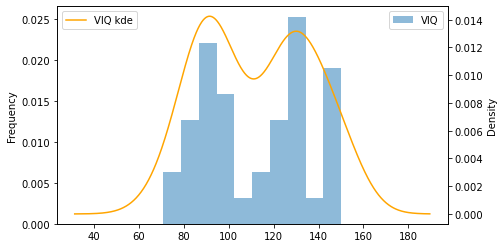

In [34]:
fig, ax = plt.subplots(figsize =(7,4))

df["VIQ"].plot.hist(alpha=0.5, density = True, label = "VIQ", ax=ax)
ax.legend()

ax_kde = ax.twinx()

df["VIQ"].plot.kde(ax=ax_kde, label="VIQ kde", color = "orange")
ax_kde.legend(loc = "upper left")


>Repeat the same plot, but arrange the Verbal IQ (VIQ), Performance IQ (PIQ), and Full-scale IQ (FSIQ) in a 1x3 grid (1 row, 3 columns)

<AxesSubplot:label='a208d2c9-0808-45bf-a9c6-952b49cfd478', ylabel='Density'>

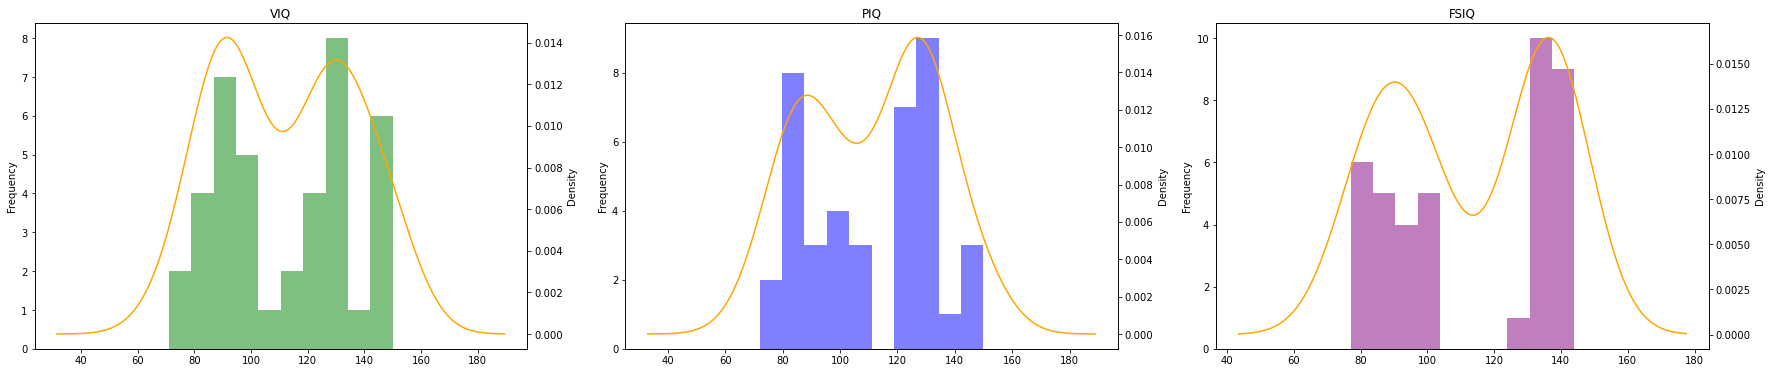

In [54]:
fig, axes = plt.subplots(ncols=3,figsize=(30,6))

df["VIQ"].plot.hist(alpha=0.5, color = "green", label = "VIQ", ax=axes[0], title ="VIQ")
ax_kde = axes[0].twinx()
df["VIQ"].plot.kde(ax=ax_kde, label="VIQ kde", color = "orange")

df["PIQ"].plot.hist(alpha=0.5, color = "blue", label = "PIQ", ax=axes[1], title ="PIQ")
ax_kde = axes[1].twinx()
df["PIQ"].plot.kde(ax=ax_kde, label="PIQ kde", color = "orange")

df["FSIQ"].plot.hist(alpha=0.5, color = "purple", label = "FSIQ", ax=axes[2], title ="FSIQ")
ax_kde = axes[2].twinx()
df["FSIQ"].plot.kde(ax=ax_kde, label="FSIQ kde", color = "orange")


>Compute the mean VIQ for men and women. Which one is higher, numerically?


In [58]:
df.groupby("Gender")[["VIQ"]].mean()

,VIQ
Gender,
Female,109.45
Male,115.25


In [56]:
#the mean is numerically higher for men 

>Is there enough evidence to conclude that gender influences the VIQ? Compute a T-test using `scipy.stats.ttest_ind` to find out. Display the p-value and write down your conclusion in plain English (i.e. spell the meaning of the resulting p-value).

In [60]:
from scipy import stats

In [61]:
viq_men = df.loc[df["Gender"]=="Male","VIQ"]
viq_women = df.loc[df["Gender"]=="Female","VIQ"]

In [64]:
t_test_viq = stats.ttest_ind(viq_men, viq_women)
t_test_viq 

Ttest_indResult(statistic=0.7726161723275011, pvalue=0.44452876778583217)

In [66]:
t_test_viq.pvalue < 0.05

False

In [67]:
#The p value of the t-test is not bellow the 0.05 of the confidence interval. 
#We don't have enough evidence to conclude that gender influences the VIQ.

>Repeat the operation for the other two IQ measures.

In [69]:
piq_men = df.loc[df["Gender"]=="Male","PIQ"]
piq_women = df.loc[df["Gender"]=="Female","PIQ"]
t_test_piq = stats.ttest_ind(piq_men, piq_women)
t_test_piq.pvalue < 0.05

False

In [74]:
#The p value of the t-test is not bellow the 0.05 of the confidence interval. 
#We don't have enough evidence to conclude that gender influences the PIQ.

In [75]:
fsiq_men = df.loc[df["Gender"]=="Male","FSIQ"]
fsiq_women = df.loc[df["Gender"]=="Female","FSIQ"]
t_test_fsiq = stats.ttest_ind(fsiq_men, fsiq_women)
t_test_fsiq.pvalue < 0.05

False

In [76]:
#The p value of the t-test is not bellow the 0.05 of the confidence interval. 
#We don't have enough evidence to conclude that gender influences the FSIQ.

>PIQ, VIQ, and FSIQ give 3 measures of IQ. Are FISQ and PIQ significantly different? Use `scipy.stats.ttest_rel` to find out, and write down the p-value and the conclusion in plain English.

In [77]:
ttest_both = stats.ttest_rel(df["FSIQ"],df["PIQ"])
ttest_both

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [78]:
ttest_both.pvalue < 0.05

False

In [79]:
#The p value of the t-test is not bellow the 0.05 of the confidence interval. 
#We don't have enough evidence to conclude that FSIQ and PIQ are significantly different.

>What are the mean and standard deviation of the Gaussian distribution that best approximates the female heights? Use `stats.norm.fit` for that.

In [83]:
female_heights = df.loc[df["Gender"]=="Female", "Height"]
mean,std = stats.norm.fit(female_heights)
print(f"The mean of the gaussian distribution that approximates female heights is: {mean}" )
print(f"The standard deviation that approximates female heights is: {std}" )

The mean of the gaussian distribution that approximates female heights is: 65.765
The standard deviation that approximates female heights is: 2.2303082746562186


>Instatiate a Gaussian distribution with the mean and standard deviation values computed before. Are the female heights really distributed along this distribution? Use `scipy.stats.kstest` to find out, and write down the p-value and the conclusion in plain English.

In [86]:
norm = stats.norm(mean,std).rvs(1000)
distrib = stats.kstest(female_heights,norm)
distrib 

KstestResult(statistic=0.129, pvalue=0.8612614009366224)

In [88]:
distrib.pvalue < 0.05

False

In [87]:
#The p value of the t-test is not bellow the 0.05 of the confidence interval. 
#We don't have enough evidence to conclude that females' heights are following a Gaussian distribution.
#Females' heights are normally distributed

>import seaborn as sns
sns.set()Plot the Probability Density Function (PDF) of the distribution above. On the same axes, plot the Kernel Density Estimation (KDE) of the female heights. The expected result looks like this:

In [89]:
import seaborn as sns
sns.set()

In [90]:
normal = np.linspace(mean - 3*std, mean + 3*std, 100)

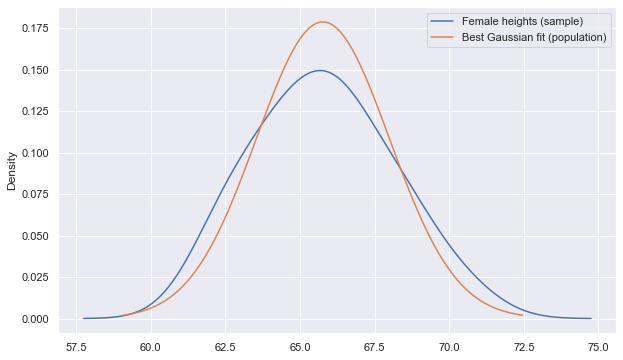

In [96]:
fig, ax = plt.subplots(figsize=(10,6))

female_heights.plot.kde(ax=ax, label="Female heights (sample)")

plt.plot(normal, stats.norm.pdf(normal,mean,std), label = "Best Gaussian fit (population)")

plt.legend()